Plotting for Timeseries models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from modules.LSTMStuff import grab_series_data, Splitted_SplitLoader
from modules.columns import COLS_LSTM, COLS_LABELS_ALL

SEED = 42
np.random.seed(SEED)

In [2]:
subseries = grab_series_data(window_size=12, features=COLS_LSTM, labels=COLS_LABELS_ALL, gapfilled=False, normalize=True)

BG23: 10176, GW_24: 10176, BG24: 4367, GW24: 4367
BG_23 done
BG_24 done
GW_23 done
GW_24 done
2986 subseries have been found, of which 0 are augmmentations of original data


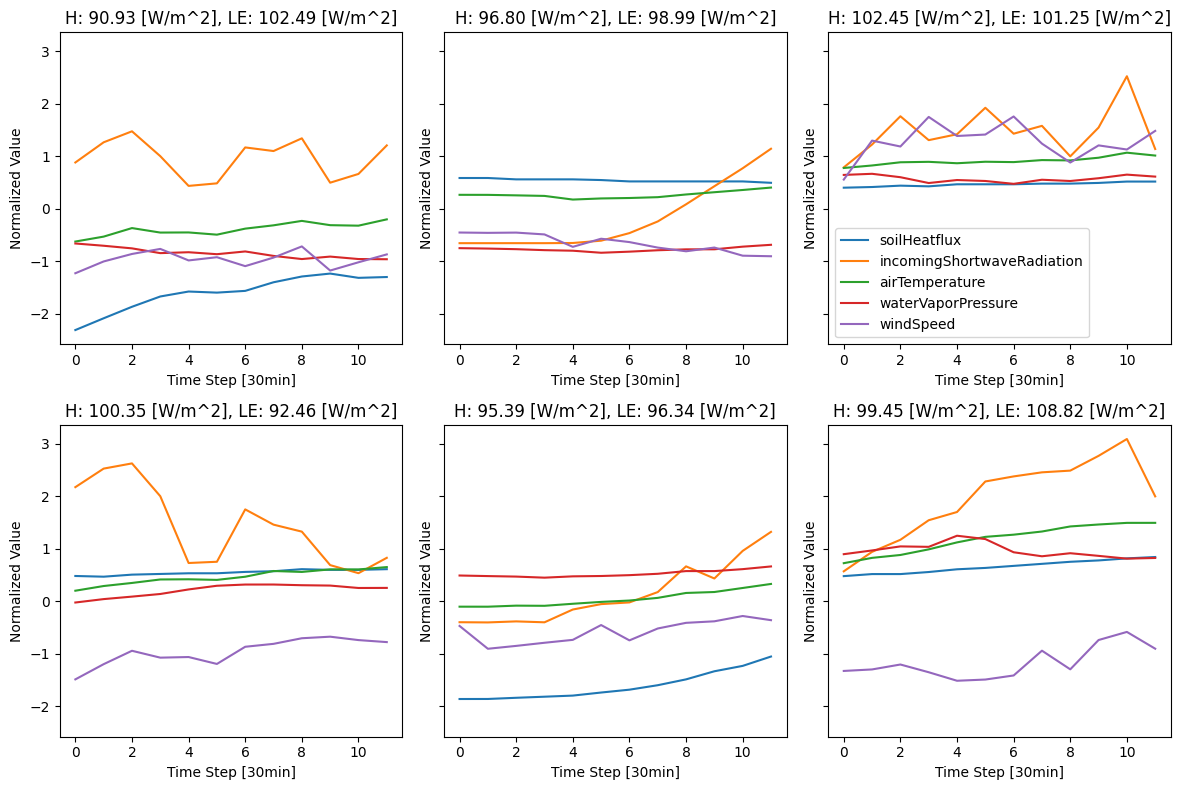

In [6]:
### Plotting series ###
values = np.array([100, 100])
margins = np.array([10, 10])

H_low, H_high = values[0] - margins[0], values[0] + margins[0]
LE_low, LE_high = values[1] - margins[1], values[1] + margins[1]

# Filter only the last row for each subseries using groupby and tail
last_rows = subseries.groupby('series_id').tail(1)
# Now get the ones where the labels are in desired region
last_rows = last_rows[(last_rows['H_orig'].between(H_low, H_high)) & 
                      (last_rows['LE_orig'].between(LE_low, LE_high))]

# Get unique IDs
unique_series =  last_rows['series_id'].unique()

if len(unique_series) < 6:
    raise ValueError("Not enough subseries found with the given label values at the end of the series.")
selected_series_ids = np.random.choice(unique_series, size=6, replace=False)

fig, axes = plt.subplots(2, 3, figsize=(14, 8), sharey=True)
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

# Loop through the selected subseries and plot each one
for i, series_id in enumerate(selected_series_ids):
    series_data = subseries[subseries['series_id'] == series_id]
    
    # Plot the features and labels in each subplot
    for feature in COLS_LSTM:
        axes[i].plot(series_data[feature].values)
    
    # Add titles and labels
    # Extract the last row to get the label values
    last_row = series_data.iloc[-1]
    label_1_value = last_row['H_orig']
    label_2_value = last_row['LE_orig']

    # Set the title with label values
    # axes[i].set_title(f"Series ID: {series_id}\nLabel 1: {label_1_value:.2f}, Label 2: {label_2_value:.2f}")
    axes[i].set_title(f"H: {label_1_value:.2f} [W/m^2], LE: {label_2_value:.2f} [W/m^2]")

    if i==2:
        axes[i].legend(COLS_LSTM, framealpha=0.8)
    
    # Add labels and legend
    axes[i].set_xlabel("Time Step [30min]")
    axes[i].set_ylabel("Normalized Value")
    #axes[i].legend()

# Adjust the layout to avoid overlap
plt.subplots_adjust(right=0.25)
#fig.legend(COLS_LSTM, loc='center left', bbox_to_anchor=(1.0, 0.5), title="Features")
plt.tight_layout()
plt.savefig(f'plots/SeriesComp_{values[0]}_{values[1]}.png', dpi=600)
plt.show()

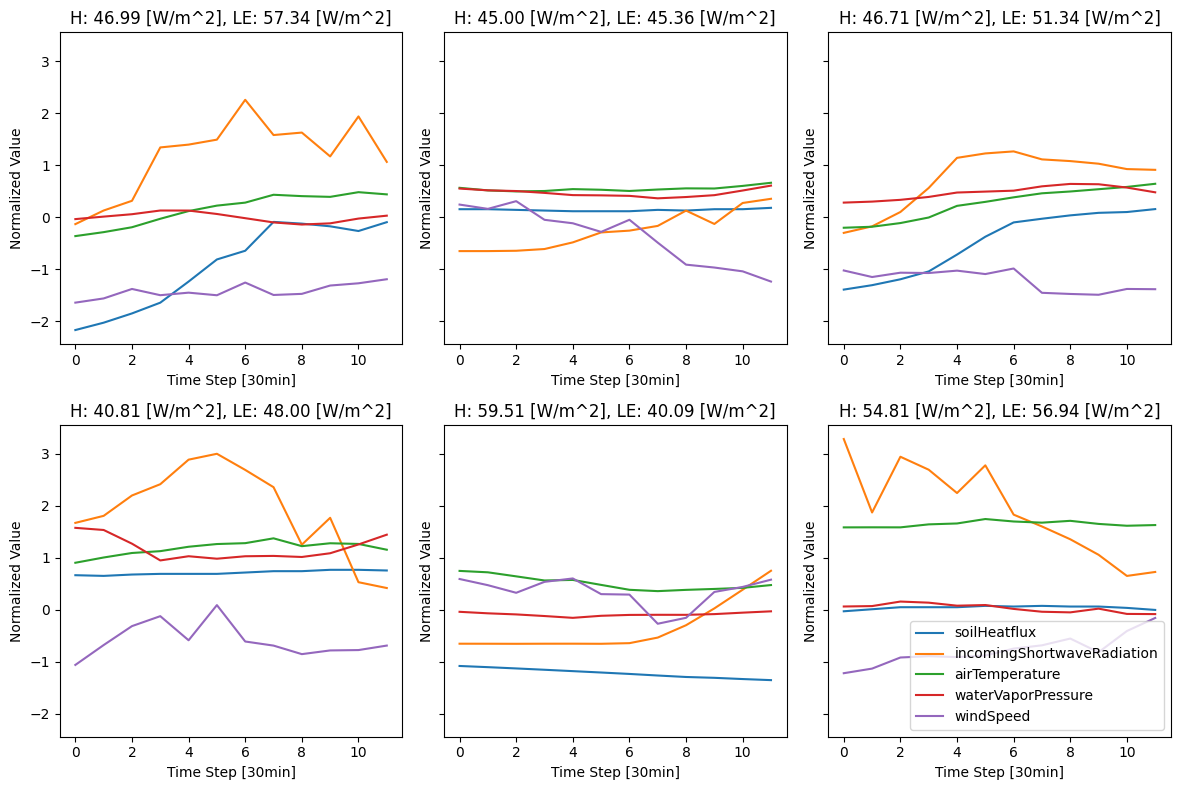

In [18]:
### Plotting series ###
values = np.array([50, 50])
margins = np.array([10, 10])

H_low, H_high = values[0] - margins[0], values[0] + margins[0]
LE_low, LE_high = values[1] - margins[1], values[1] + margins[1]

# Filter only the last row for each subseries using groupby and tail
last_rows = subseries.groupby('series_id').tail(1)
# Now get the ones where the labels are in desired region
last_rows = last_rows[(last_rows['H_orig'].between(H_low, H_high)) & 
                      (last_rows['LE_orig'].between(LE_low, LE_high))]

# Get unique IDs
unique_series =  last_rows['series_id'].unique()

if len(unique_series) < 6:
    raise ValueError("Not enough subseries found with the given label values at the end of the series.")
selected_series_ids = np.random.choice(unique_series, size=6, replace=False)

fig, axes = plt.subplots(2, 3, figsize=(14, 8), sharey=True)
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

# Loop through the selected subseries and plot each one
for i, series_id in enumerate(selected_series_ids):
    series_data = subseries[subseries['series_id'] == series_id]
    
    # Plot the features and labels in each subplot
    for feature in COLS_LSTM:
        axes[i].plot(series_data[feature].values)
    
    # Add titles and labels
    # Extract the last row to get the label values
    last_row = series_data.iloc[-1]
    label_1_value = last_row['H_orig']
    label_2_value = last_row['LE_orig']

    # Set the title with label values
    # axes[i].set_title(f"Series ID: {series_id}\nLabel 1: {label_1_value:.2f}, Label 2: {label_2_value:.2f}")
    axes[i].set_title(f"H: {label_1_value:.2f} [W/m^2], LE: {label_2_value:.2f} [W/m^2]")

    if i==5:
       axes[i].legend(COLS_LSTM, framealpha=0.8)
    
    # Add labels and legend
    axes[i].set_xlabel("Time Step [30min]")
    axes[i].set_ylabel("Normalized Value")
    #axes[i].legend()

# Adjust the layout to avoid overlap
plt.subplots_adjust(right=0.25)
#fig.legend(COLS_LSTM, loc='center left', bbox_to_anchor=(1.0, 0.5), title="Features")
plt.tight_layout()
plt.savefig(f'plots/SeriesComp_{values[0]}_{values[1]}.png', dpi=600)
plt.show()